In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('country.csv')

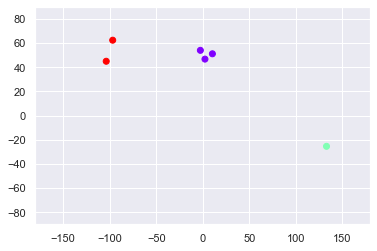

In [3]:
data
data_mapped = data.copy()
data_mapped['Language']= data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped
x= data_mapped.iloc[:,1:4]
x
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c= data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [5]:
kmeans.inertia_

290.10523333333333

Calculating WCSS

In [7]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [8]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Here each point is a different cluster

42605.41356666667, ---->1 cluster
 13208.958119999996,--->2 Cluster
 290.10523333333333,--->3 Cluster
 113.91233333333332,--->4 Cluster
 39.00624999999998, --->5 Cluster
 0.0]------------------>6 Cluster

# The elbow method

Text(0, 0.5, 'With-in Cluster sum of squares')

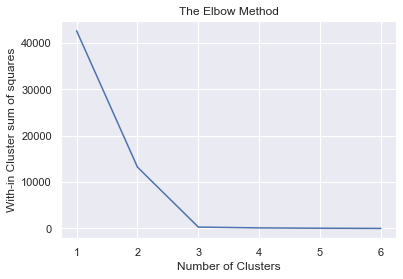

In [10]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("With-in Cluster sum of squares")

## A two cluster solution would be suboptimal as the the leap from 2 to 3 is very big